In [0]:
#%% Load Libraries
import pandas as pd
import numpy as np
import nltk
import sklearn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
import random


In [2]:
from google.colab import drive
import os 

drive.mount('/content/gdrive')
root_path ='gdrive/My Drive/Colab Notebooks/Final Project'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#%%
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Final Project/full_data.csv', error_bad_lines=False)
print(data)
data = data.dropna()
X_title = data[["title"]]
X_desc = data[["description"]]
X_content = data[["content"]]
y = data[["source"]]
print(X_title.shape)
print(X_desc.shape)
print(y.shape)
#%%
print(X_title)
print(X_desc)
type(X_desc)
type(data)
#%%
counts = data.groupby(["source"]).count()
print(counts)


              source  ...                                            content
0          The Verge  ...  Filed under:\r\nThe company is rumored to show...
1          The Verge  ...  The highest number of requests came from India...
2          The Verge  ...  Regulations will end the Double Irish and Dutc...
3          The Verge  ...  Apple has filed patents for the tech in both h...
4          The Verge  ...  Check in on what friends are playing\r\nFor pe...
...              ...  ...                                                ...
3105  Breitbart News  ...  Rep. Jim Banks (R-IN) slammed far-left “Squad”...
3106  Breitbart News  ...  Brexit Party leader Nigel Farage believes Prin...
3107  Breitbart News  ...  The investigative author behind the game-chang...
3108  Breitbart News  ...  A forthcoming bombshell book from publishing g...
3109       The Verge  ...  It gamifies hype on Twitch\r\nImage: Twitch\r\...

[3110 rows x 8 columns]
(2461, 1)
(2461, 1)
(2461, 1)
                     

In [10]:

#%% Vectorize Dataset title
#  unigram term frequency vectorizer
Vect1= CountVectorizer()
X1=Vect1.fit_transform(data['title'])
ColumnNames1 = Vect1.get_feature_names()
title = pd.DataFrame(X1.toarray(),columns = ColumnNames1)
print(title)
#%%
#  bigram and trigram term frequency vectorizer title
Vect= CountVectorizer(ngram_range = (2,3))
X2=Vect.fit_transform(data['title'])
ColumnNames = Vect.get_feature_names()
titlengram = pd.DataFrame(X2.toarray(),columns = ColumnNames)
print(titlengram)
#%% Vectorize Dataset description
#  unigram term frequency vectorizer
Vect3= CountVectorizer()
X3=Vect3.fit_transform(data['description'])
ColumnNames3 = Vect3.get_feature_names()
description = pd.DataFrame(X3.toarray(),columns = ColumnNames3)
print(description)
#%%
#  bigram and trigram term frequency vectorizer description
Vect4= CountVectorizer(ngram_range = (2,3))
X4=Vect4.fit_transform(data['description'])
ColumnNames4 = Vect4.get_feature_names()
descriptionngram = pd.DataFrame(X4.toarray(),columns = ColumnNames4)
print(descriptionngram)
#%%


      000  10  100  100th  102  ...  zimbabwe  zombie  zone  zuckerberg  zumwalt
0       0   0    0      0    0  ...         0       0     0           0        0
1       0   0    0      0    0  ...         0       0     0           0        0
2       0   0    0      0    0  ...         0       0     0           0        0
3       0   0    0      0    0  ...         0       0     0           0        0
4       0   0    0      0    0  ...         0       0     0           0        0
...   ...  ..  ...    ...  ...  ...       ...     ...   ...         ...      ...
2456    0   0    0      0    0  ...         0       0     0           0        0
2457    0   0    0      0    0  ...         0       0     0           0        0
2458    0   0    0      0    0  ...         0       0     0           0        0
2459    0   0    0      0    0  ...         0       0     0           0        0
2460    0   0    0      0    0  ...         0       0     0           0        0

[2461 rows x 6023 columns]


In [4]:
#%% Vectorize Dataset content
#  unigram term frequency vectorizer
Vect5= CountVectorizer()
X5=Vect5.fit_transform(data['content'])
ColumnNames5 = Vect5.get_feature_names()
content = pd.DataFrame(X5.toarray(),columns = ColumnNames5)
print(content)
#%%
#  bigram and trigram term frequency vectorizer content
Vect6= CountVectorizer(ngram_range = (2,3))
X6=Vect6.fit_transform(data['content'])
ColumnNames6 = Vect6.get_feature_names()
contentngram = pd.DataFrame(X6.toarray(),columns = ColumnNames6)
print(contentngram)
#%%

      00  000  004  01  017  03  ...  ziad  zine  zone  zoo  zuckerberg  zurich
0      0    0    0   0    0   0  ...     0     0     0    0           0       0
1      0    0    0   0    0   0  ...     0     0     0    0           0       0
2      0    0    0   0    0   0  ...     0     0     0    0           0       0
3      0    0    0   0    0   0  ...     0     0     0    0           0       0
4      0    0    0   0    0   0  ...     0     0     0    0           0       0
...   ..  ...  ...  ..  ...  ..  ...   ...   ...   ...  ...         ...     ...
2456   0    0    0   0    0   0  ...     0     0     0    0           0       0
2457   0    0    0   0    0   0  ...     0     0     0    0           0       0
2458   0    0    0   0    0   0  ...     0     0     0    0           0       0
2459   0    0    0   0    0   0  ...     0     0     0    0           0       0
2460   0    0    0   0    0   0  ...     0     0     0    0           0       0

[2461 rows x 14043 columns]
      00 01

In [0]:
# Find number of clusters
def caluclate_wcss(data):
    wcss = []
    for n in range(3, 13):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(X = data)
        wcss.append(kmeans.inertia_)
        
    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 10, wcss[len(wcss)-1]
    
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1) * x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1) **2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    return distances.index(max(distances)) +2


In [0]:
random.seed(77)
sum_of_squares = caluclate_wcss(contentngram)

n = optimal_number_of_clusters(sum_of_squares)


In [8]:
print(n)

5


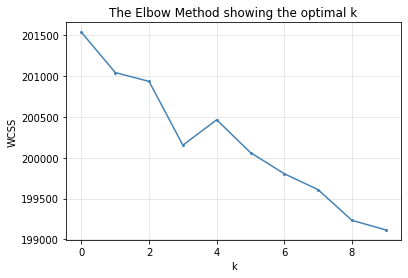

In [13]:

#plot WCSS
plt.plot( sum_of_squares, 'bx-', color = 'steelblue', marker = 'o', markersize =2, markerfacecolor = 'steelblue')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(color='lightgrey', linestyle= '-', linewidth = 0.5)
plt.title('The Elbow Method showing the optimal k')
plt.show()
#%%


In [0]:
#plot clusters
plt.scatter()

In [17]:
# clustering using title
kmtitle = KMeans(n_clusters=4, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
custitle = kmtitle.fit_predict(title) #4

kmtitlengram = KMeans(n_clusters=4, algorithm ='auto', init='random', n_init=20, random_state=0, verbose=False)
clustitlengram = kmtitlengram.fit_predict(titlengram) #9

# clustering using description
kmdesc = KMeans(n_clusters=4, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
cusdesc = kmdesc.fit_predict(description)  #6

kmdescngram = KMeans(n_clusters=4, algorithm ='auto', init='random', n_init=20, random_state=0, verbose=False)
clusdescngram = kmdescngram.fit_predict(descriptionngram) #3

# clustering using content
kmdesc = KMeans(n_clusters=4, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
cuscon = kmdesc.fit_predict(content) #5

kmdescngram = KMeans(n_clusters=4, algorithm ='auto', init='random', n_init=20, random_state=0, verbose=False)
clusconngram = kmdescngram.fit_predict(contentngram) #5
#%%
y['descngram'] = pd.Series(clusdescngram, index=y.index)
y['desc'] = pd.Series(cusdesc, index=y.index)
y['titlengram'] = pd.Series(clustitlengram, index=y.index)
y['title'] = pd.Series(custitle, index=y.index)
y['content'] = pd.Series(cuscon, index=y.index)
y['contentngram'] = pd.Series(clusconngram, index=y.index)
#%%

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

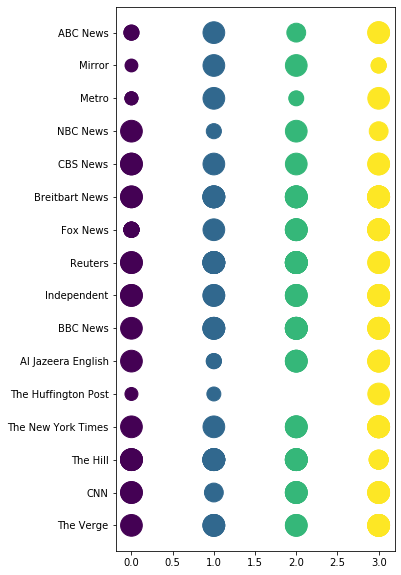

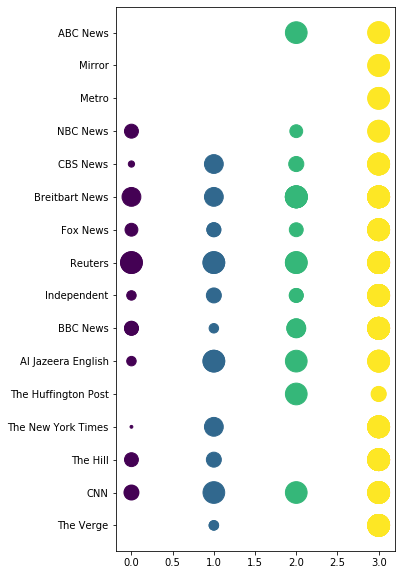

In [18]:

plt.figure(figsize=(5,10))
plt.scatter(y['content'],y['source'],c=y['content'], s=y['source'].value_counts())

plt.figure(figsize=(5,10))
plt.scatter(y['contentngram'],y['source'],c=y['contentngram'], s=y['source'].value_counts())

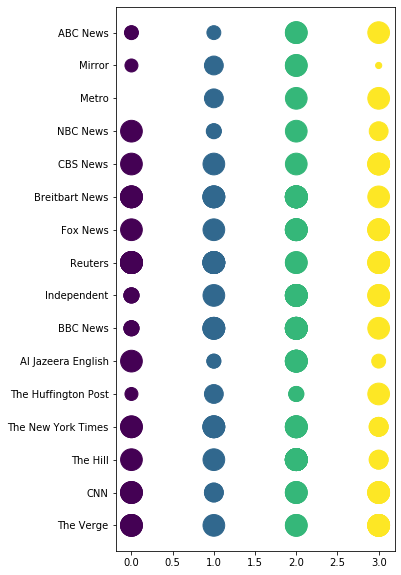

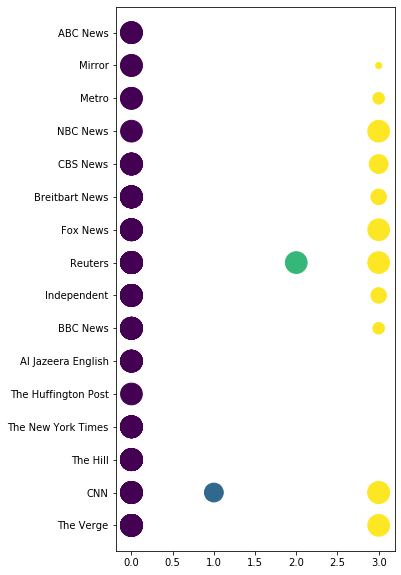

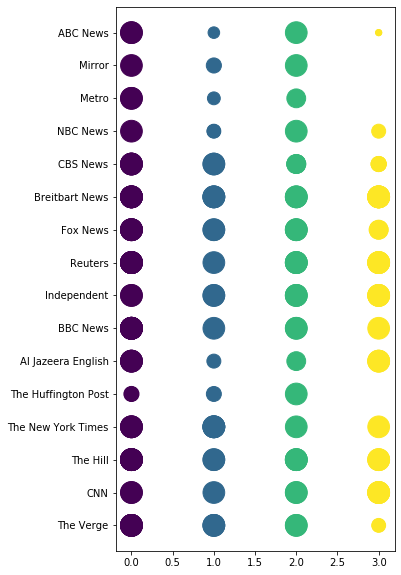

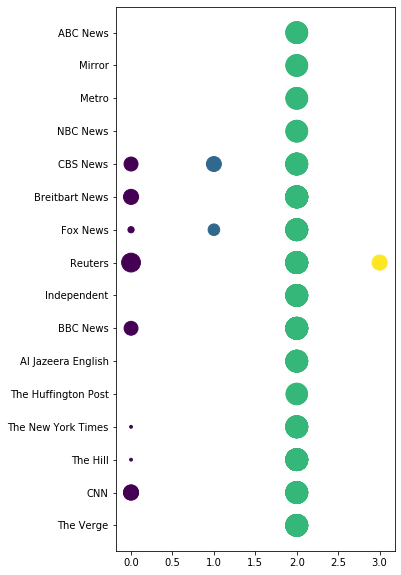

In [19]:

plt.figure(figsize=(5,10))
plt.scatter(y['desc'],y['source'],c=y['desc'], s=y['source'].value_counts())
#%%
plt.figure(figsize=(5,10))
plt.scatter(y['descngram'],y['source'],c=y['descngram'], s=y['source'].value_counts())
#%%
plt.figure(figsize=(5,10))
plt.scatter(y['title'],y['source'],c=y['title'], s=y['source'].value_counts())
#%%
plt.figure(figsize=(5,10))
plt.scatter(y['titlengram'],y['source'],c=y['titlengram'], s=y['source'].value_counts())


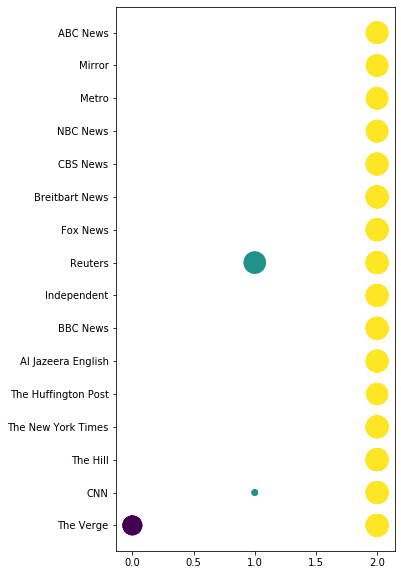

In [57]:
plt.figure(figsize=(5,10))
plt.scatter(y['descngram'],y['source'],c=y['descngram'], s=y['source'].value_counts())
#%%


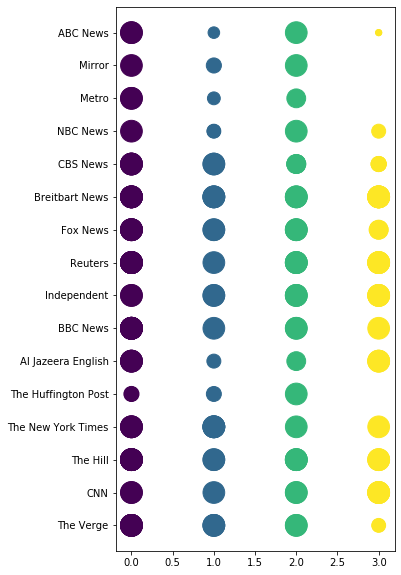

In [58]:
plt.figure(figsize=(5,10))
plt.scatter(y['title'],y['source'],c=y['title'], s=y['source'].value_counts())


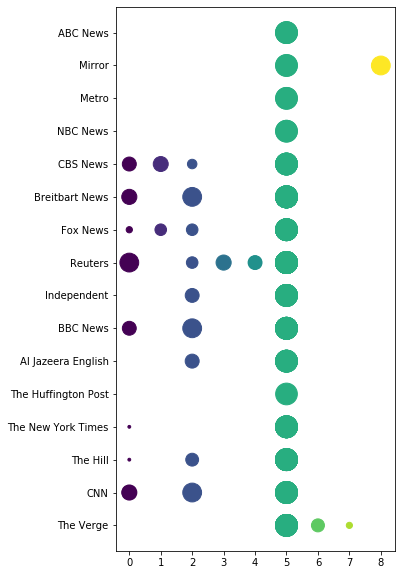

In [59]:
#%%
plt.figure(figsize=(5,10))
plt.scatter(y['titlengram'],y['source'],c=y['titlengram'], s=y['source'].value_counts())
